## Adding one additional label as a catch all "Other"

In [1]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset
from datasets import load_dataset

In [2]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
df = pd.read_csv('data/cleaned_master.csv')

In [4]:
df.head()

,text,date,label,label_name,id
0,{{USERNAME}} Fair enough! Honestly I can not i...,2024-04-26,2,bible,1783677542588727555
1,{{USERNAME}} {{USERNAME}} I hear ya. I wasn’t ...,2024-04-26,2,bible,1783677542005649587
2,{{USERNAME}} Holy reach #BUST,2024-04-26,2,bible,1783677527355174915
3,{{USERNAME}} I was out to dinner tonight and j...,2024-04-26,2,bible,1783677526901932435
4,{{USERNAME}} Holy shit,2024-04-26,2,bible,1783677526537064910


In [5]:
# import re

# # Define a function to remove the leading number, period, and space
# def remove_number(text):
#     # Regular expression pattern to match a number followed by a period and a space
#     pattern = r'^\d+\.\s'
    
#     # Use re.sub to replace the matched pattern with an empty string
#     return re.sub(pattern, '', text)

# # Apply the function to the text content column
# df['text'] = df['text'].apply(remove_number)

# # df.to_csv('data/New Data/newDataCleaned.csv', index=False)

In [6]:
df.head()

,text,date,label,label_name,id
0,{{USERNAME}} Fair enough! Honestly I can not i...,2024-04-26,2,bible,1783677542588727555
1,{{USERNAME}} {{USERNAME}} I hear ya. I wasn’t ...,2024-04-26,2,bible,1783677542005649587
2,{{USERNAME}} Holy reach #BUST,2024-04-26,2,bible,1783677527355174915
3,{{USERNAME}} I was out to dinner tonight and j...,2024-04-26,2,bible,1783677526901932435
4,{{USERNAME}} Holy shit,2024-04-26,2,bible,1783677526537064910


In [7]:
dataset = load_dataset("cardiffnlp/tweet_topic_single")

In [8]:
dataset1 = dataset['test_2020']
df1 = pd.DataFrame(dataset1)
print(len(df1))

dataset2 = dataset['test_2020']
df2 = pd.DataFrame(dataset2)
print(len(df2))

dataset3 = dataset['validation_2020']
df3 = pd.DataFrame(dataset3)
print(len(df3))


concatenated_df = pd.concat([df1, df2], ignore_index=True)
concatenated_df = pd.concat([concatenated_df, df2], ignore_index=True)

print(len(concatenated_df))

376
376
352
1128


In [9]:
concatenated_df['label'] = 11
concatenated_df['label_name'] = 'Other'

concatenated_df.head()

,text,date,label,label_name,id
0,Game day for {{USERNAME}} U18’s against {{USER...,2019-09-08,11,Other,1170606779568463874
1,⚽️ This afternoon we have our first League gam...,2019-09-08,11,Other,1170607436924952576
2,Might watch the {@Tennessee Titans@} game only...,2019-09-08,11,Other,1170666727845376000
3,. {@Asante Kotoko SC@} should have moved for t...,2019-09-08,11,Other,1170728379290673154
4,Massive WELL DONE to BSLFC Reserves today in t...,2019-09-08,11,Other,1170788768690970624


In [10]:
combined_df = pd.concat([df, concatenated_df], ignore_index=True)
print(len(combined_df))

10198


In [11]:
# combined_df = df.copy()
combined_df.dropna(inplace=True)

In [12]:
combined_df['label_name'].unique()

array(['bible', 'current_events', 'fellowship', 'Jerusalem', 'Jesus',
       'Kingdom', 'prayer', 'prophesy', 'salvation', 'worship', 'Other'],
      dtype=object)

In [13]:
labels = combined_df['label_name'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['bible',
 'current_events',
 'fellowship',
 'Jerusalem',
 'Jesus',
 'Kingdom',
 'prayer',
 'prophesy',
 'salvation',
 'worship',
 'Other']

In [14]:
combined_df = combined_df.drop(['label'], axis=1)
combined_df.head()

,text,date,label_name,id
0,{{USERNAME}} Fair enough! Honestly I can not i...,2024-04-26,bible,1783677542588727555
1,{{USERNAME}} {{USERNAME}} I hear ya. I wasn’t ...,2024-04-26,bible,1783677542005649587
2,{{USERNAME}} Holy reach #BUST,2024-04-26,bible,1783677527355174915
3,{{USERNAME}} I was out to dinner tonight and j...,2024-04-26,bible,1783677526901932435
4,{{USERNAME}} Holy shit,2024-04-26,bible,1783677526537064910


In [15]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [16]:
label2id

{'bible': 0,
 'current_events': 1,
 'fellowship': 2,
 'Jerusalem': 3,
 'Jesus': 4,
 'Kingdom': 5,
 'prayer': 6,
 'prophesy': 7,
 'salvation': 8,
 'worship': 9,
 'Other': 10}

In [17]:
id2label

{0: 'bible',
 1: 'current_events',
 2: 'fellowship',
 3: 'Jerusalem',
 4: 'Jesus',
 5: 'Kingdom',
 6: 'prayer',
 7: 'prophesy',
 8: 'salvation',
 9: 'worship',
 10: 'Other'}

In [18]:
combined_df["labels"]=combined_df.label_name.map(lambda x: label2id[x.strip()])

In [19]:
combined_df.head()

,text,date,label_name,id,labels
0,{{USERNAME}} Fair enough! Honestly I can not i...,2024-04-26,bible,1783677542588727555,0
1,{{USERNAME}} {{USERNAME}} I hear ya. I wasn’t ...,2024-04-26,bible,1783677542005649587,0
2,{{USERNAME}} Holy reach #BUST,2024-04-26,bible,1783677527355174915,0
3,{{USERNAME}} I was out to dinner tonight and j...,2024-04-26,bible,1783677526901932435,0
4,{{USERNAME}} Holy shit,2024-04-26,bible,1783677526537064910,0


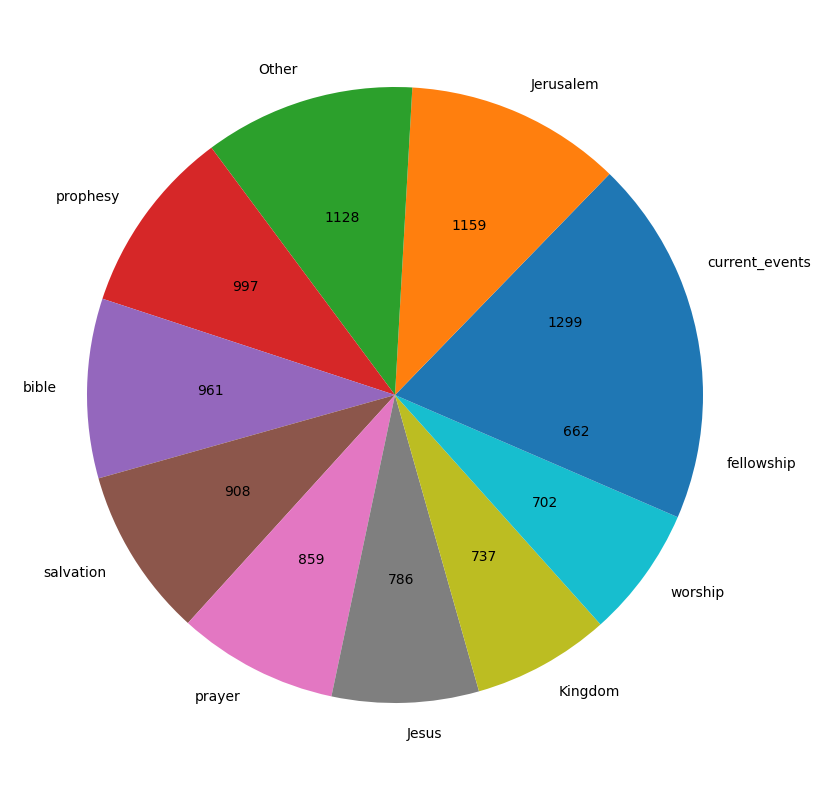

In [20]:
import matplotlib.pyplot as plt

counts = combined_df.label_name.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))
plt.show()

In [21]:
checkpoint = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = BertTokenizerFast.from_pretrained(checkpoint, max_length=512, ignore_mismatched_sizes=True)

model = BertForSequenceClassification.from_pretrained(checkpoint, num_labels=NUM_LABELS, id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([11, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([11]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [22]:
combined_df = combined_df.sample(frac=1, random_state=42) 

In [23]:
combined_df.shape[0]

10198

In [24]:
SIZE = combined_df.shape[0]

train_texts = list(combined_df.text[:SIZE//2])

val_texts =   list(combined_df.text[SIZE//2:(3*SIZE)//4])

test_texts =  list(combined_df.text[(3*SIZE)//4:])

train_labels = list(combined_df.labels[:SIZE//2])

val_labels =   list(combined_df.labels[SIZE//2:(3*SIZE)//4])

test_labels =  list(combined_df.labels[(3*SIZE)//4:])

In [25]:
len(train_texts), len(val_texts), len(test_texts)

(5099, 2549, 2550)

In [26]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [27]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [28]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [29]:
from transformers import TrainingArguments, Trainer

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.
    
    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of 
              that observation belonging to a certain class.
              
    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids
    
    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)
    
    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    
    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)
    
    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [31]:
training_args = TrainingArguments(
    output_dir='./TTC-Model', 
    do_train=True,
    do_eval=True,
    num_train_epochs=3,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=200,                
    weight_decay=0.01,
    logging_strategy='steps',               
    logging_dir='./multi-class-logs',            
    logging_steps=300,
    evaluation_strategy="steps",
    eval_steps=300,
    save_steps=300,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [32]:
from transformers import EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=3)


trainer = Trainer(
    model=model,                      
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=val_dataloader,            
    compute_metrics= compute_metrics,
    callbacks=[early_stopping]
)

In [33]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
300,1.248600,0.324081,0.919969,0.916378,0.918366,0.915401
600,0.290800,0.247139,0.939192,0.936967,0.940983,0.934557
900,0.198500,0.227026,0.941153,0.937770,0.939294,0.937674


TrainOutput(global_step=957, training_loss=0.5582369193512569, metrics={'train_runtime': 423.5312, 'train_samples_per_second': 36.118, 'train_steps_per_second': 2.26, 'total_flos': 2845896264499284.0, 'train_loss': 0.5582369193512569, 'epoch': 3.0})

In [34]:
q=[trainer.evaluate(eval_dataset=df) for df in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.135529,0.963718,0.961259,0.962097,0.961386
val,0.227026,0.941153,0.937770,0.939294,0.937674
test,0.243633,0.944706,0.941660,0.943038,0.941081


In [35]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [36]:
def predict(text):
    """
    Predicts the class label for a given input text

    Args:
        text (str): The input text for which the class label needs to be predicted.

    Returns:
        probs (torch.Tensor): Class probabilities for the input text.
        pred_label_idx (torch.Tensor): The index of the predicted class label.
        pred_label (str): The predicted class label.
    """
    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    """ Explanation outputs: The BERT model returns a tuple containing the output logits (and possibly other elements depending on the model configuration). In this case, the output logits are the first element in the tuple, which is why we access it using outputs[0].

    outputs[0]: This is a tensor containing the raw output logits for each class. The shape of the tensor is (batch_size, num_classes) where batch_size is the number of input samples (in this case, 1, as we are predicting for a single input text) and num_classes is the number of target classes.

    softmax(1): The softmax function is applied along dimension 1 (the class dimension) to convert the raw logits into class probabilities. Softmax normalizes the logits so that they sum to 1, making them interpretable as probabilities. """

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label 
    # Since pred_label_idx is a tensor containing a single value (the predicted class index), 
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]

    return pred_label

In [37]:
# Test model
text = "Machine Learning and automation is awesome!!"

predict(text)

'Other'

In [38]:
# Test model
text = "Jesus is amazing!!"

predict(text)

'Jesus'

In [39]:
# Test model
text = "How is your day going?"

predict(text)

'Other'

In [40]:
# Test model
text = "Praise the Lord!"

predict(text)

'worship'

In [42]:
# Test model
text = "Holy Bible"

predict(text)

'bible'

In [44]:
# Test model
text = "Pizza"

predict(text)

'Other'

In [46]:
# Test model
text = "How can I pray for you today?"

predict(text)

'prayer'

In [48]:
# Test model
text = "Prophecy"

predict(text)

'prophesy'

In [49]:
import pandas as pd
import random
import ipywidgets as widgets
from IPython.display import display


def get_random_offensive_row(combined_df):
    filtered_df = combined_df[combined_df['label_name'] == 'Prayer']
    if not filtered_df.empty:
        return filtered_df.sample(n=1)
    else:
        return pd.DataFrame()

def on_button_click(b):
    random_row = get_random_offensive_row(df)
    output.clear_output()
    with output:
        display(random_row)

button = widgets.Button(description="Get Random Row")
output = widgets.Output()

button.on_click(on_button_click)
display(button, output)

Button(description='Get Random Row', style=ButtonStyle())

Output()

In [53]:
import datetime
from transformers import AutoTokenizer, Trainer

# Get the current timestamp
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H-%M")

# Path to save the model and tokenizer
save_path = f"./models/model_{timestamp}"

# Save the model
trainer.save_model(save_path)

# Save the tokenizer
tokenizer.save_pretrained(save_path)

('./models/model_2024-05-21 21-24\\tokenizer_config.json',
 './models/model_2024-05-21 21-24\\special_tokens_map.json',
 './models/model_2024-05-21 21-24\\vocab.txt',
 './models/model_2024-05-21 21-24\\added_tokens.json',
 './models/model_2024-05-21 21-24\\tokenizer.json')

In [55]:
from huggingface_hub import notebook_login

notebook_login()

In [62]:
# push to the hub
model_name = "bert-base-tweet-topic-classification"
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

README.md:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/GeeDino/bert-base-tweet-topic-classification/commit/af6dea50e55c47365a8837906d679b0b2be12b88', commit_message='Upload tokenizer', commit_description='', oid='af6dea50e55c47365a8837906d679b0b2be12b88', pr_url=None, pr_revision=None, pr_num=None)